## Análise Climática de Szeged, Hungria (2006-2016) com Machine Learning

## Objetivos: 
### Etapa 1: Análise Exploratória de Dados (EDA)
Na primeira etapa, o foco é a análise exploratória dos dados climáticos coletados entre 2006 e 2016. Serão investigadas as distribuições das variáveis como temperatura, umidade, vento e visibilidade, além de identificar padrões sazonais e a relação entre diferentes variáveis climáticas, como a correlação entre temperatura real e aparente, e a influência da velocidade do vento na visibilidade. Através de gráficos e estatísticas, será possível compreender a dinâmica do clima na região de Szeged e suas variações ao longo dos anos.
#### Perguntas a serem respondidas
- 1) Qual o tipo de clima ("summary") mais comum em Szeged, Hungria, por ano, entre 2006 e 2016?

- 2) Existe uma correlação entre a temperatura real (temperature) e a temperatura aparente (apparentTemperature)?

- 3) Como a umidade (humidity) varia ao longo dos meses do ano?


### Etapa 2: Aplicação de Machine Learning
Na segunda etapa, um modelo de Machine Learning será treinado para prever a temperatura com base em variáveis como umidade, velocidade do vento e condições climáticas.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1 - Importando minha base e verificando meus dados

In [75]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [76]:
#Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [77]:
#Verificando se existe duplicados
df.duplicated().sum()

np.int64(24)

In [78]:
#Entendendo valores duplicados
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [79]:
#Verificando se existe nulos
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [80]:
#Entendendo valores nullos
df['Precip Type'].value_counts()

Precip Type
rain    85200
snow    10712
Name: count, dtype: int64

In [108]:
#Removendo colunas sem valor
df.drop('Loud Cover',axis=1,inplace=True)

In [81]:
#Substituindo nulos pela moda
df['Precip Type'] = df['Precip Type'].fillna('rain')

2 -  Entendendo minhas variaveis

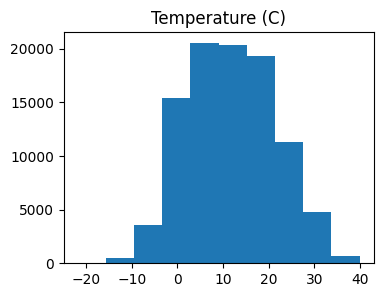

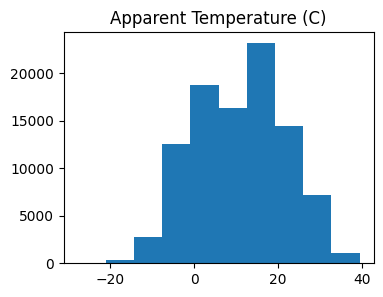

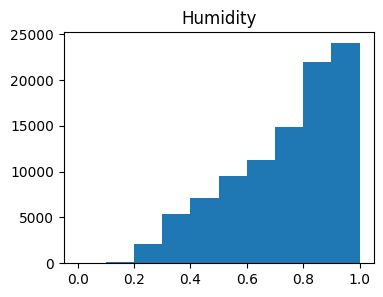

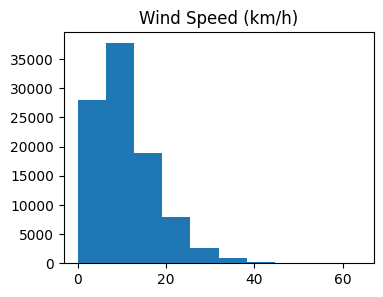

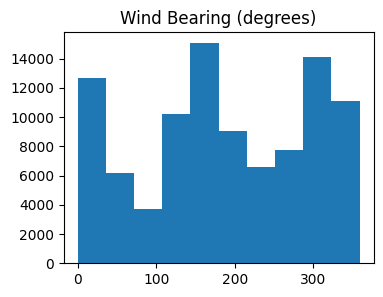

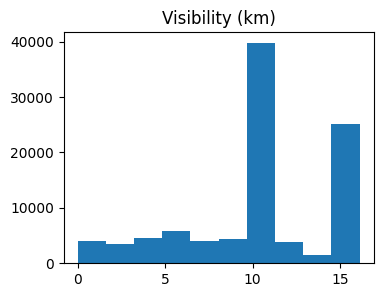

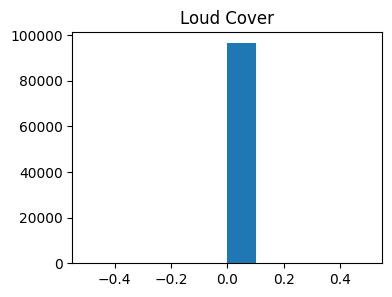

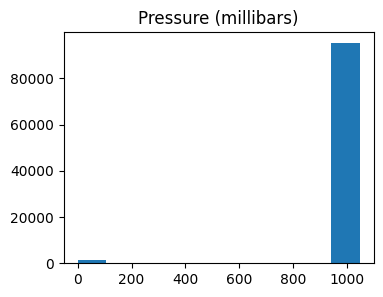

In [82]:
#Visualizando variaveis numericas
c = df.select_dtypes(include='number').columns
for i in c:
    plt.figure(figsize=(4,3))
    plt.hist(df[i])
    plt.title(i)
    plt.show()
    

3 - Preparando meus dados

In [83]:
#removendo o fuso horario
df['Formatted Date'] = df['Formatted Date'].str.replace(r'\+.*', '', regex=True) 


In [84]:
# Convertendo para date time
df['Formatted Date'] = pd.to_datetime(df['Formatted Date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96429 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Formatted Date            96429 non-null  datetime64[ns]
 1   Summary                   96429 non-null  object        
 2   Precip Type               96429 non-null  object        
 3   Temperature (C)           96429 non-null  float64       
 4   Apparent Temperature (C)  96429 non-null  float64       
 5   Humidity                  96429 non-null  float64       
 6   Wind Speed (km/h)         96429 non-null  float64       
 7   Wind Bearing (degrees)    96429 non-null  float64       
 8   Visibility (km)           96429 non-null  float64       
 9   Loud Cover                96429 non-null  float64       
 10  Pressure (millibars)      96429 non-null  float64       
 11  Daily Summary             96429 non-null  object        
dtypes: datetime64[ns](1), f

In [85]:
df['year'] = df['Formatted Date'].dt.year
df['month'] = df['Formatted Date'].dt.month
df['hour'] = df['Formatted Date'].dt.hour
df.drop('Formatted Date',axis=1,inplace=True)

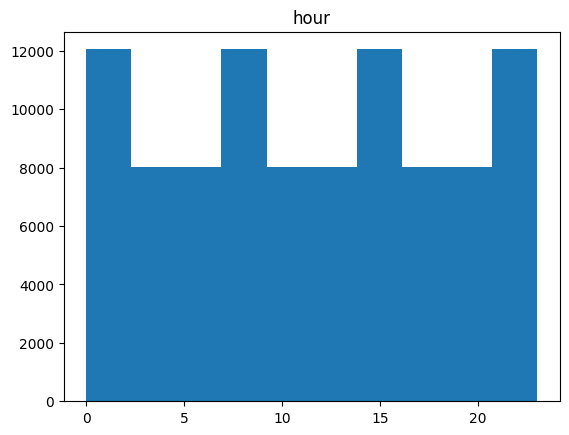

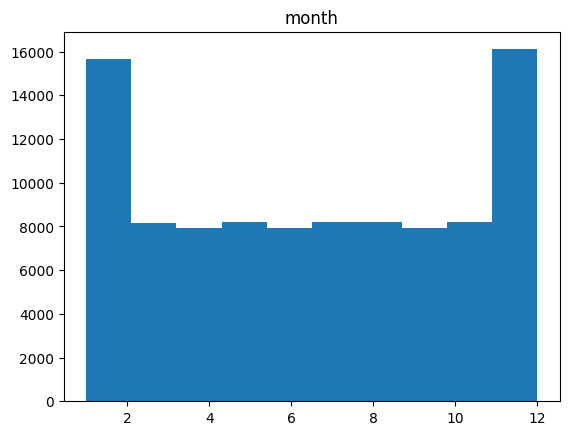

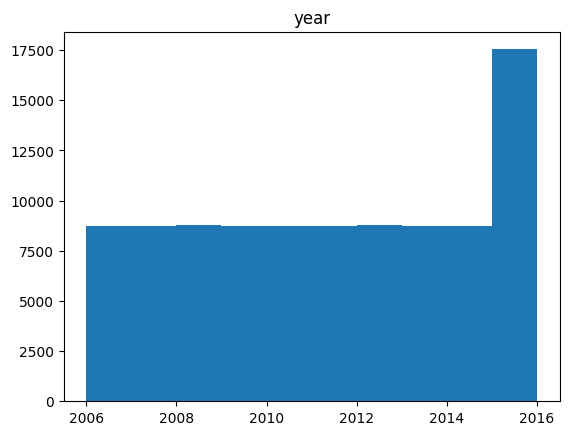

In [86]:
#Visualizando nossas novas culunas, 
#obs. Nota-se que temos maior volumes de registros entre novembro-fevereiro, e no ano de 2016 os registros aumentaram
c = ['hour', 'month','year']
for i in c:
    plt.hist(df[i])
    plt.title(i)
    plt.show()


In [87]:
# guardando os valores de quantidade dentro de uma variavel para usar na proxima celula
summary_counts = df.Summary.value_counts()

In [88]:
# como temos um baixo número de registros para algumas categorias de 'Summary', iremos adicionar uma nova classe 'Other'
# e atribuir as classes com menos de 100 registros
def new_class_other(x):
    if summary_counts[x] < 100:
        return 'other'
    else:
        return x
df.Summary = df.Summary.apply(new_class_other)

In [89]:
#verificando
df.Summary.value_counts()

Summary
Partly Cloudy               31726
Mostly Cloudy               28094
Overcast                    16597
Clear                       10873
Foggy                        7148
other                         561
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Name: count, dtype: int64

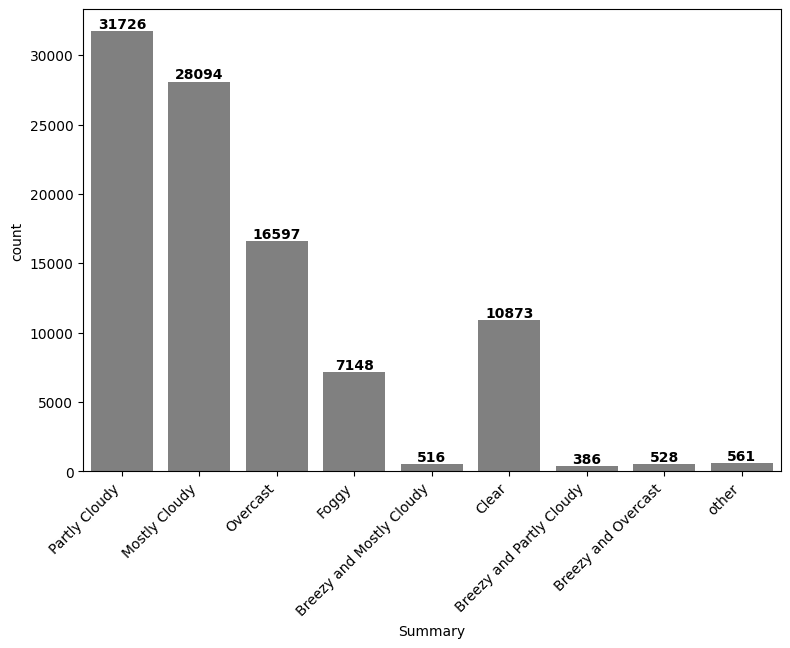

In [90]:
# Criar a figura
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x='Summary', color='gray')

# Adicionar rótulos de dados acima das barras
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # Posição X centralizada
            p.get_height(),  # Posição Y (altura da barra)
            int(p.get_height()),  # O rótulo (valor da contagem)
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Ajustar tamanho das fontes
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotacionar rótulos do eixo X se necessário
plt.yticks(fontsize=10)

# Exibir o gráfico
plt.show()


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96429 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96429 non-null  object 
 1   Precip Type               96429 non-null  object 
 2   Temperature (C)           96429 non-null  float64
 3   Apparent Temperature (C)  96429 non-null  float64
 4   Humidity                  96429 non-null  float64
 5   Wind Speed (km/h)         96429 non-null  float64
 6   Wind Bearing (degrees)    96429 non-null  float64
 7   Visibility (km)           96429 non-null  float64
 8   Loud Cover                96429 non-null  float64
 9   Pressure (millibars)      96429 non-null  float64
 10  Daily Summary             96429 non-null  object 
 11  year                      96429 non-null  int32  
 12  month                     96429 non-null  int32  
 13  hour                      96429 non-null  int32  
dtypes: float64(

In [92]:
# Não precisamos fazer nenhuma alteração nessa variavel categorica por enquanto
df['Precip Type'].value_counts()

Precip Type
rain    85717
snow    10712
Name: count, dtype: int64

In [93]:
# como essa variavel e um 'diario', não vai ter valor para nossa análise
df['Daily Summary'].value_counts()
df.drop('Daily Summary',axis=1,inplace=True)

# Respondendo as perguntas
- 1) **Qual o tipo de clima ("summary") mais comum em Szeged, Hungria, por ano, entre 2006 e 2016?** <br>
Dos anos 2006 a 2013 tivemos o Resumo mais frequente de 'Partly Cloudy', 2014 'Mostly Cloudy', 2015 'Partly Cloudy' e 2016 'Mostly Cloudy'

- 2) **Existe uma correlação entre a temperatura real (temperature) e a temperatura aparente (apparentTemperature)?** <br>
Sim, de -30 ate 10 existe um leve superajuste, de 10 ate 25 existe uma alta precisão, e de 25 ate 40 existe um pequeno subajuste

- 3) **Como a umidade (humidity) varia ao longo dos meses do ano?**<br>
Tem um forte aumento de Agosto ~ Dezembro, e apartir de janeiro começa um forte queda até abril


In [94]:
perg1 = df[['year','Summary']]

mais_frequente = perg1.groupby('year')['Summary'].value_counts().groupby(level=0).idxmax()
df_resultado = pd.DataFrame({'Ano': mais_frequente.index, 
                             'Resumo_Mais_Frequente': mais_frequente.str[1]})

df_resultado

,Ano,Resumo_Mais_Frequente
year,,
2006,2006,Partly Cloudy
2007,2007,Partly Cloudy
2008,2008,Partly Cloudy
2009,2009,Partly Cloudy
2010,2010,Partly Cloudy
2011,2011,Partly Cloudy
2012,2012,Partly Cloudy
2013,2013,Partly Cloudy
2014,2014,Mostly Cloudy


<Axes: xlabel='Temperature (C)', ylabel='Apparent Temperature (C)'>

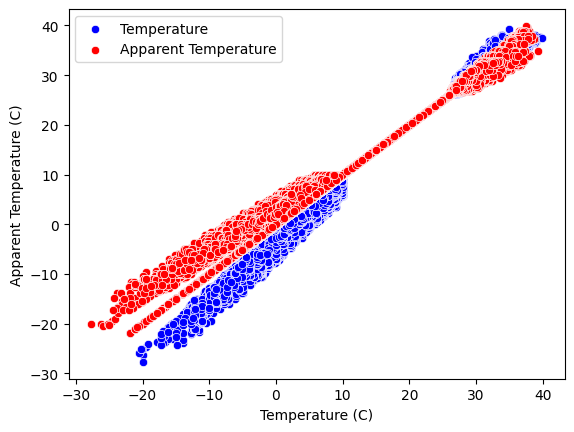

In [95]:
perg2 = df[['Temperature (C)','Apparent Temperature (C)']]

sns.scatterplot(data=perg2, x='Temperature (C)', y='Apparent Temperature (C)', color='blue', label='Temperature')
# Plotar Apparent Temperature (C) em vermelho
sns.scatterplot(data=perg2, x='Apparent Temperature (C)', y='Temperature (C)', color='red', label='Apparent Temperature')

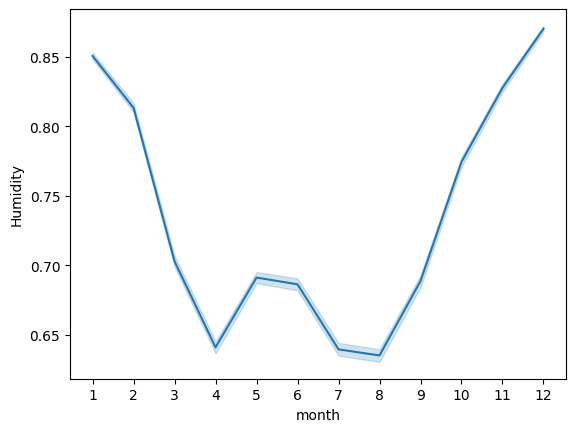

In [96]:
sns.lineplot(data=df, x='month',y = 'Humidity')
plt.xticks(range(1,13,1))
plt.show()

# Iniciando nossa etapa 2 - Modelo de regressão

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96429 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96429 non-null  object 
 1   Precip Type               96429 non-null  object 
 2   Temperature (C)           96429 non-null  float64
 3   Apparent Temperature (C)  96429 non-null  float64
 4   Humidity                  96429 non-null  float64
 5   Wind Speed (km/h)         96429 non-null  float64
 6   Wind Bearing (degrees)    96429 non-null  float64
 7   Visibility (km)           96429 non-null  float64
 8   Loud Cover                96429 non-null  float64
 9   Pressure (millibars)      96429 non-null  float64
 10  year                      96429 non-null  int32  
 11  month                     96429 non-null  int32  
 12  hour                      96429 non-null  int32  
dtypes: float64(8), int32(3), object(2)
memory usage: 9.2+ MB


In [98]:
# Transformando minhas variaveis 'string' em númericas]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Summary'] = le.fit_transform(df['Summary'])
df['Precip Type'] = le.fit_transform(df['Precip Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96429 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96429 non-null  int64  
 1   Precip Type               96429 non-null  int64  
 2   Temperature (C)           96429 non-null  float64
 3   Apparent Temperature (C)  96429 non-null  float64
 4   Humidity                  96429 non-null  float64
 5   Wind Speed (km/h)         96429 non-null  float64
 6   Wind Bearing (degrees)    96429 non-null  float64
 7   Visibility (km)           96429 non-null  float64
 8   Loud Cover                96429 non-null  float64
 9   Pressure (millibars)      96429 non-null  float64
 10  year                      96429 non-null  int32  
 11  month                     96429 non-null  int32  
 12  hour                      96429 non-null  int32  
dtypes: float64(8), int32(3), int64(2)
memory usage: 9.2 MB


In [99]:
#Separando meu treino/teste
from sklearn.model_selection import train_test_split
X = df.drop(['Temperature (C)','Apparent Temperature (C)'], axis=1)
y = df['Temperature (C)']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [100]:
#Padronizando meus dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal = scaler.transform(x_test)


In [ ]:
#Modelo Base
#Para nosso modelo base, usaremos um modelo simples de regressão, para usar as metricas como ponto de partida
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scal,y_train)
model.score(x_test_scal,y_test)

0.6247837865419787

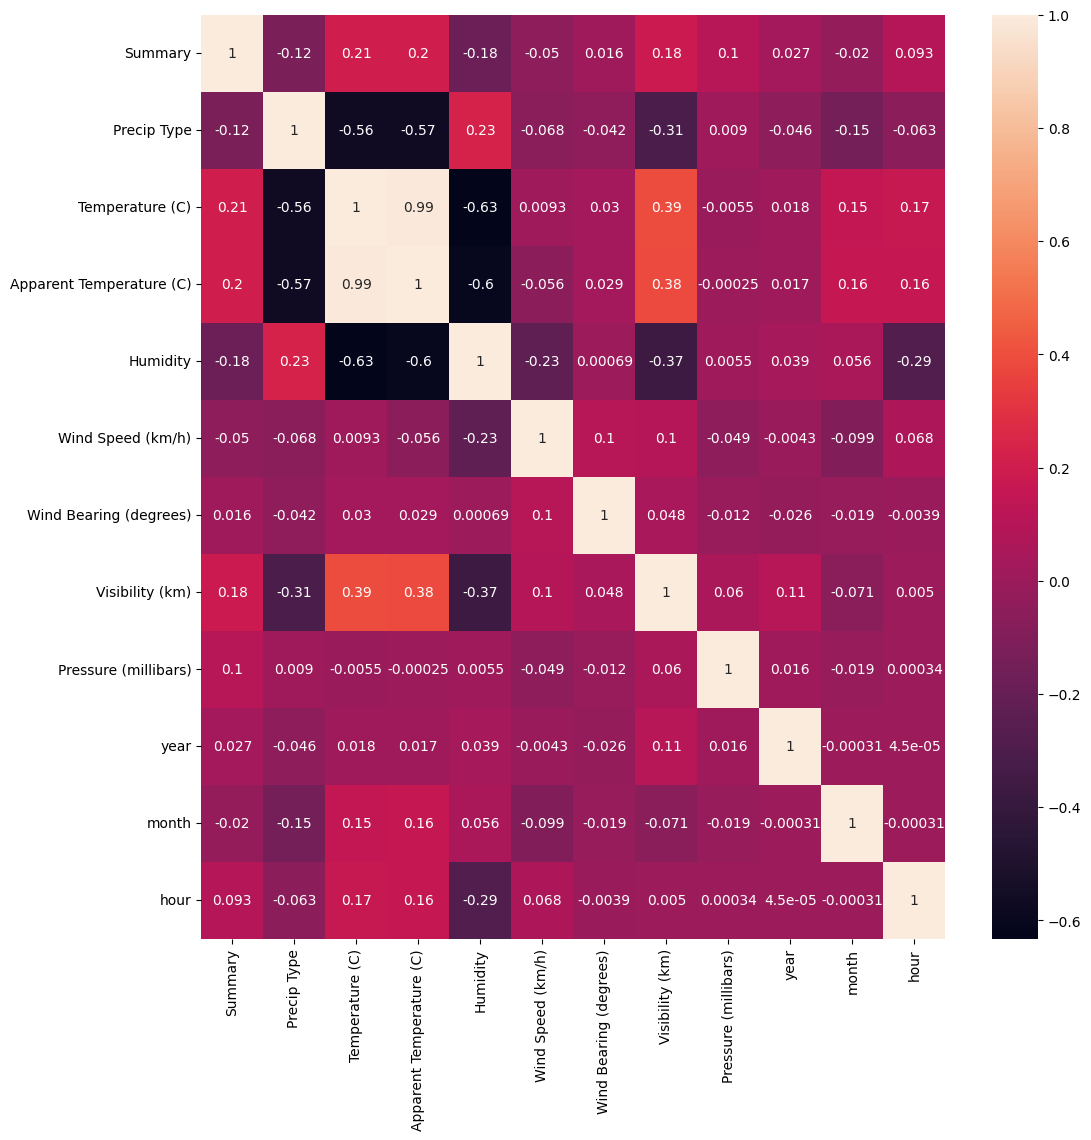

In [ ]:
#Vamos tentar novamente com um modelo mais robusto, e com algumas features a menos(removendo as menos importantes)
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
new_X = df.drop(['Temperature (C)','Apparent Temperature (C)','year','Pressure (millibars)', 'Wind Speed (km/h)'], axis=1)
new_y = df['Temperature (C)']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
